In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

from sklearn.model_selection import train_test_split
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Train images shape:", train_images.shape)
print("Validation images shape", validation_images.shape)

Train images shape: (48000, 28, 28)
Validation images shape (12000, 28, 28)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

def create_model():
  model = Sequential([
      Flatten(input_shape=(28,28)),
      Dense(128, activation='relu'),
      Dropout(0.2),
      Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model
  # history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(validation_images, validation_labels))

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_per_fold = []
loss_per_fold = []
models = []

In [ ]:
for train_index, val_index in kfold.split(train_images):
    model = create_model()
    X_train_fold, X_val_fold = train_images[train_index], train_images[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold))
    accuracy_per_fold.append(history.history['val_accuracy'][-1])
    loss_per_fold.append(history.history['val_loss'][-1])
    models.append(model)

Epoch 1/5
1350/1350 [==============================] - 10s 7ms/step - loss: 0.3259 - accuracy: 0.9058 - val_loss: 0.1621 - val_accuracy: 0.9527
Epoch 2/5
1350/1350 [==============================] - 6s 5ms/step - loss: 0.1654 - accuracy: 0.9509 - val_loss: 0.1153 - val_accuracy: 0.9677
Epoch 3/5
1350/1350 [==============================] - 5s 4ms/step - loss: 0.1227 - accuracy: 0.9637 - val_loss: 0.0959 - val_accuracy: 0.9719
Epoch 4/5
1350/1350 [==============================] - 6s 5ms/step - loss: 0.0979 - accuracy: 0.9699 - val_loss: 0.0823 - val_accuracy: 0.9773
Epoch 5/5
1350/1350 [==============================] - 9s 6ms/step - loss: 0.0847 - accuracy: 0.9733 - val_loss: 0.0752 - val_accuracy: 0.9779
Epoch 1/5
1350/1350 [==============================] - 8s 4ms/step - loss: 0.3406 - accuracy: 0.9009 - val_loss: 0.1773 - val_accuracy: 0.9475
Epoch 2/5
1350/1350 [==============================] - 11s 8ms/step - loss: 0.1653 - accuracy: 0.9514 - val_loss: 0.1297 - val_accuracy: 0.96

In [ ]:
import numpy as np
for i in range(10):
    print(f"Fold {i+1}: Accuracy = {accuracy_per_fold[i]:.4f}, Loss = {loss_per_fold[i]:.4f}")

average_accuracy = np.mean(accuracy_per_fold)
print(f"Average accuracy across folds: {average_accuracy:.4f}")


Fold 1: Accuracy = 0.9779, Loss = 0.0752
Fold 2: Accuracy = 0.9735, Loss = 0.0976
Fold 3: Accuracy = 0.9760, Loss = 0.0870
Fold 4: Accuracy = 0.9700, Loss = 0.1005
Fold 5: Accuracy = 0.9744, Loss = 0.0864
Fold 6: Accuracy = 0.9685, Loss = 0.0987
Fold 7: Accuracy = 0.9729, Loss = 0.0889
Fold 8: Accuracy = 0.9712, Loss = 0.0859
Fold 9: Accuracy = 0.9708, Loss = 0.1035
Fold 10: Accuracy = 0.9685, Loss = 0.1081
Average accuracy across folds: 0.9724


In [ ]:
#Tính	và	in	ra	 Mean	 Accuracy,	 Standard	deviation	accuracy (độ	lệch	 chuẩn	của	Accuracy),	Mean	Loss,	 Standard	deviation loss	của	mô	hình	trong	quá	 trình	huấn	luyện
mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

print("Mean Accuracy: {:.4f}, Standard Deviation of Accuracy: {:.4f}".format(mean_accuracy, std_accuracy))
print("Mean Loss: {:.4f}, Standard Deviation of Loss: {:.4f}".format(mean_loss, std_loss))

Mean Accuracy: 0.9724, Standard Deviation of Accuracy: 0.0030
Mean Loss: 0.0932, Standard Deviation of Loss: 0.0096


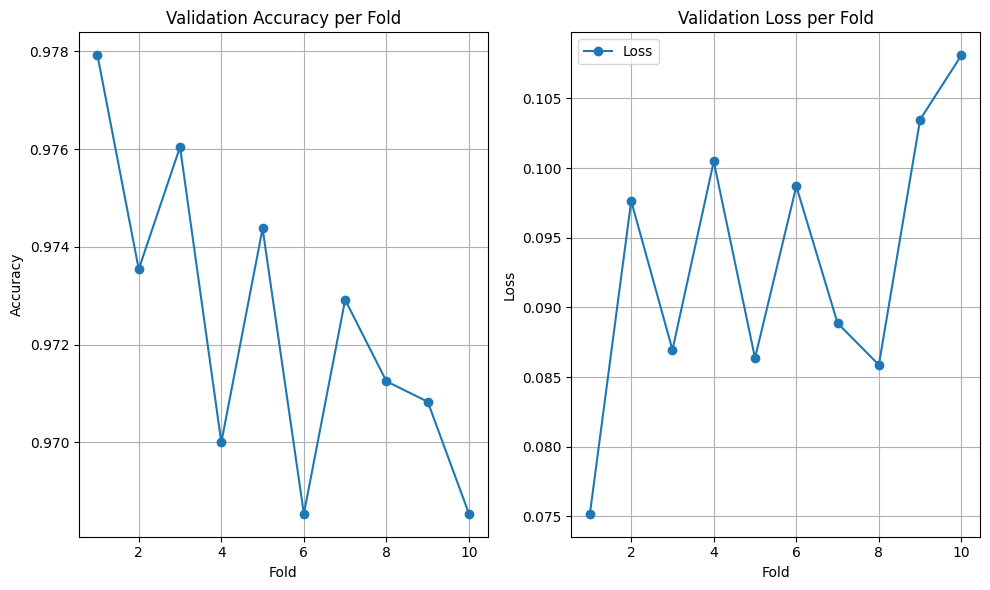

In [ ]:
import matplotlib.pyplot as plt
k = len(accuracy_per_fold)
# Assuming you have already completed the k-fold loop with:
# - accuracy_per_fold: list containing validation accuracy for each fold
# - loss_per_fold: list containing validation loss for each fold
# - k (number of folds)

# Create separate plots for accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(121)  # Subplot 1 in a row of 2
plt.plot(range(1, k + 1), accuracy_per_fold, marker='o', label='Accuracy')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot loss
plt.subplot(122)  # Subplot 2 in a row of 2
plt.plot(range(1, k + 1), loss_per_fold, marker='o', label='Loss')
plt.title('Validation Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#Sử	dụng	mô	hình	có	Accuracy	tốt	nhất giữa	các	fold trong	quá	trình	huấn	luyện	và phân	lớp	cho	tập	test
best_model_index = np.argmax(accuracy_per_fold)
best_model = models[best_model_index]

# Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print(f"Accuracy on test set: {test_accuracy:.4f}")

#Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của	 mô	hình	trên	 tập	test
y_probs_test = best_model.predict(test_images)
y_pred_test = np.argmax(y_probs_test, axis=1)
print(classification_report(test_labels, y_pred_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9752
Accuracy on test set: 0.9752
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



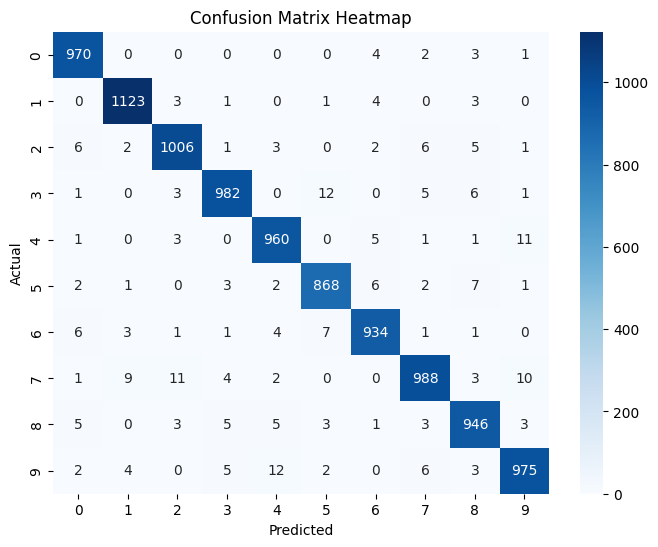

In [ ]:
#Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)
cf_matrix = confusion_matrix(test_labels, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

1/1 [==============================] - 0s 105ms/step


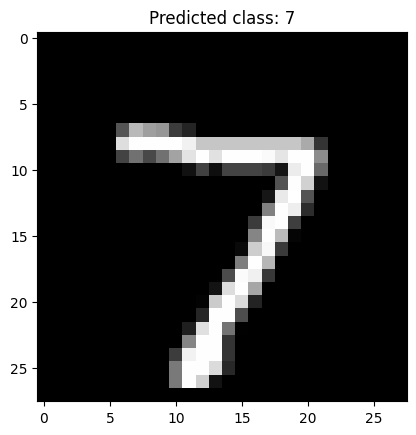

1/1 [==============================] - 0s 49ms/step


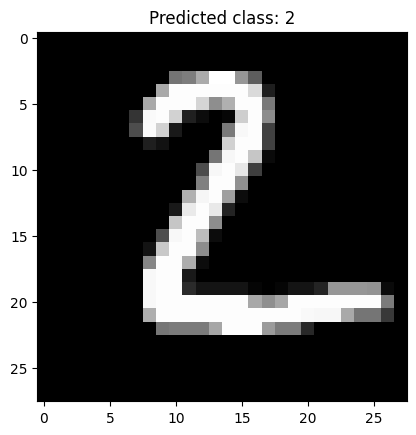

1/1 [==============================] - 0s 41ms/step


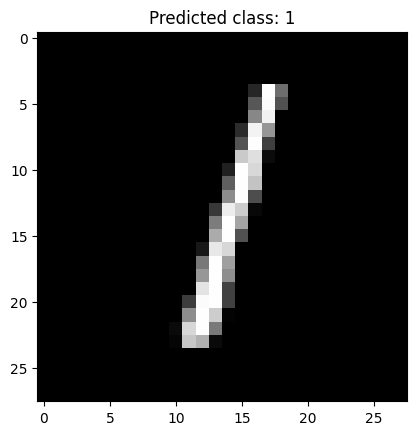

1/1 [==============================] - 0s 37ms/step


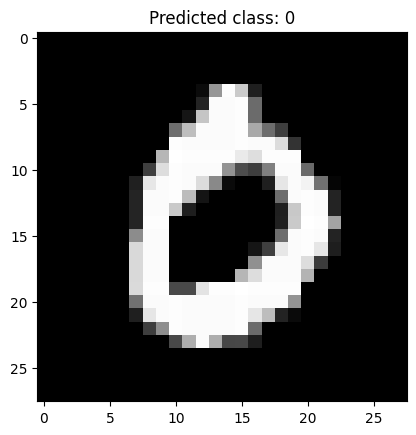

1/1 [==============================] - 0s 37ms/step


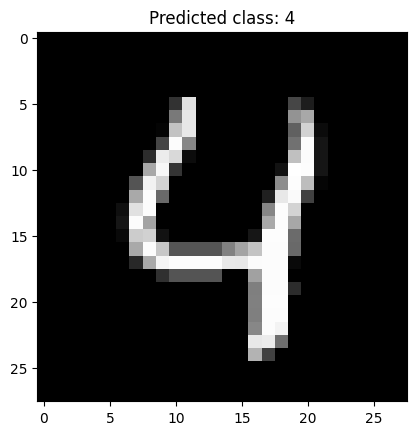

In [19]:
for i in range(5):
    img = test_images[i]
    img = np.expand_dims(img, axis=0)
    pred = best_model.predict(img)
    pred_class = np.argmax(pred, axis=1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title("Predicted class: {}".format(pred_class[0]))
    plt.show()

313/313 [==============================] - 2s 7ms/step
05 kết quả đầu tiên mà mô hình phân loại sai:
Ảnh số 150 dự đoán là: 9  - Nhãn thực tế: 2
Ảnh số 152 dự đoán là: 8  - Nhãn thực tế: 9
Ảnh số 248 dự đoán là: 2  - Nhãn thực tế: 4
Ảnh số 260 dự đoán là: 0  - Nhãn thực tế: 6
Ảnh số 322 dự đoán là: 7  - Nhãn thực tế: 2

Các ảnh tương ứng:


<Figure size 1000x500 with 0 Axes>

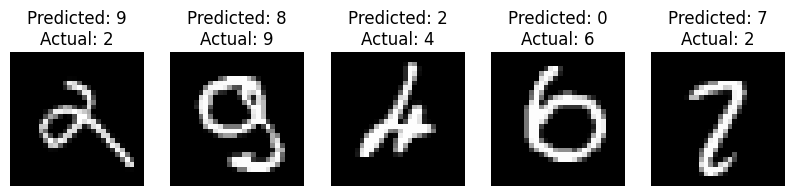

In [21]:
test_images_expanded = np.expand_dims(test_images, axis=-1)

predicted_labels = best_model.predict(test_images_expanded)
predicted_labels = np.argmax(predicted_labels, axis=1)

incorrect_indices = np.where(predicted_labels != test_labels)[0]

print("05 kết quả đầu tiên mà mô hình phân loại sai:")
plt.figure(figsize=(10, 5))
for i in range(5):
    index = incorrect_indices[i]
    print("Ảnh số", index+1, "dự đoán là:", predicted_labels[index], " - Nhãn thực tế:", test_labels[index])

print("\nCác ảnh tương ứng:")
plt.figure(figsize=(10, 5))
for i, index in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[index], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[index]}\nActual: {test_labels[index]}")
    plt.axis('off')
plt.show()